---
# Show the Correlation of Inputs

In [1]:
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df = df.dropna()

# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)

df[need_norm] = norm

df_pandas_encoded = pd.get_dummies(df, columns=['sex', 'day', 'month'], drop_first=True)
df_pandas_encoded.head()

,age,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd,sex_M,sex_U,day_1,day_2,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,-1.007650,-0.795643,-0.502892,2310,-0.442905,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.007650,-0.795643,-0.502892,2310,-0.442905,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.759528,-0.788811,-0.373469,16,-0.405740,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.759528,-0.788811,-0.373469,16,-0.405740,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.007650,-0.795643,-0.502892,2310,-0.442905,M,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


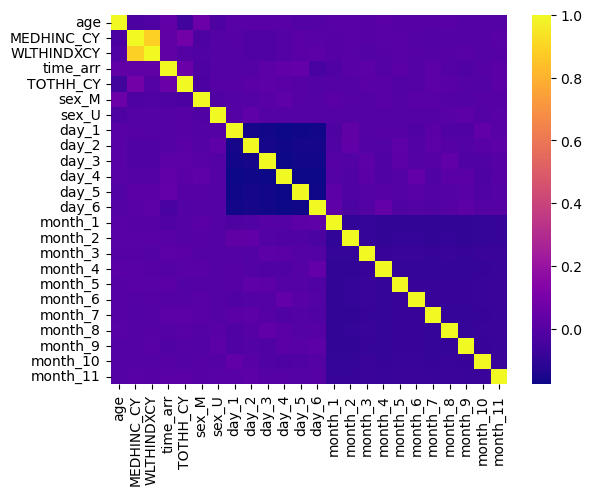

In [3]:
dataplot = sb.heatmap(df_pandas_encoded.corr(numeric_only=True), cmap='plasma')